In [2]:
import matplotlib.pyplot as plt
import numpy as np

Per Layer

In [3]:
def plot_comparison_barplot(data1, data2, data3, labels):
    y_pos = np.arange(len(labels))
    
    # Set the height of the bars
    bar_height = 0.275
    

    plt.figure(figsize=(10, 8))

    
    # Plotting the bars horizontally
    plt.barh(y_pos, data1, height=bar_height, label='Simple')
    plt.barh(y_pos + bar_height, data2, height=bar_height, label='Tandem')
    plt.barh(y_pos + 2 * bar_height, data3, height=bar_height, label='One Layer')
    
    # Set labels, title, and ticks on the y-axis
    plt.xlabel('MAE Loss (K)')
    plt.ylabel('Layer')
    plt.title('Comparison Bar Plot (lower is better)')
    plt.yticks(y_pos + bar_height, labels)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()


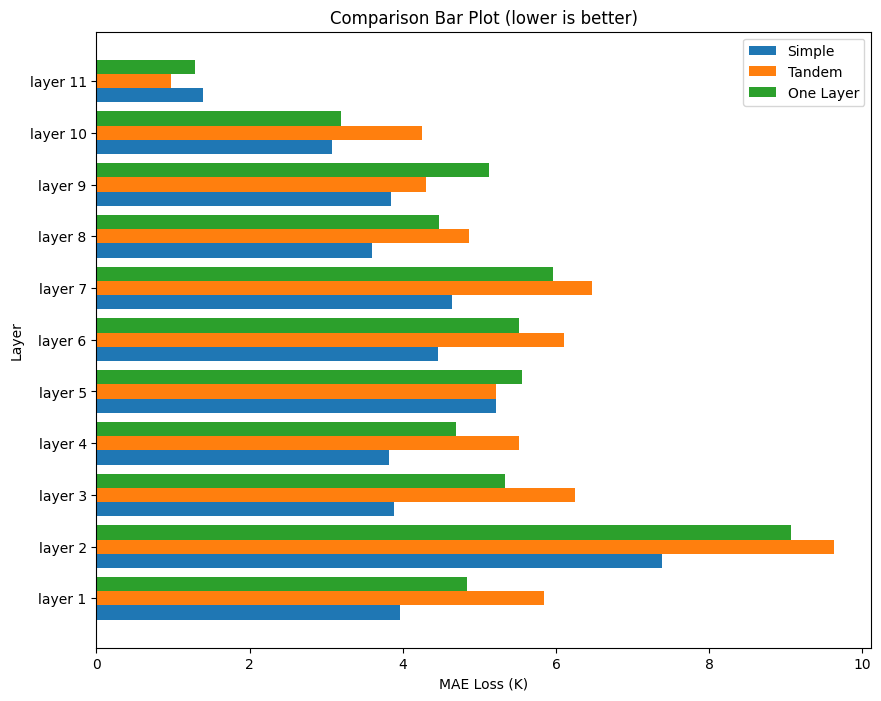

In [4]:
# Example data
simple_net = [3.9608819484710693, 7.380452632904053, 3.8881325721740723, 3.82489275932312, 5.222698211669922, 4.4564900398254395, 4.647767066955566, 3.6026723384857178, 3.84635591506958, 3.0799193382263184, 1.3909181356430054]
tandem = [5.8428569678104285, 9.635546551328718, 6.244161941065933, 5.510320120146781, 5.222086403586648, 6.106497146144058, 6.465910339355469, 4.8705516930782435, 4.307635359330611, 4.244142798221472, 0.9801585804332387]
one_layer = [4.832449913024902, 9.064400672912598, 5.3370137214660645, 4.69439172744751, 5.55186128616333, 5.520548343658447, 5.958747863769531, 4.478097438812256, 5.11892032623291, 3.198521137237549, 1.283570408821106]

labels = [f'layer {layer+1}' for layer in range(11)]

# Plot the comparison bar plot
plot_comparison_barplot(simple_net, tandem, one_layer, labels)

Overall

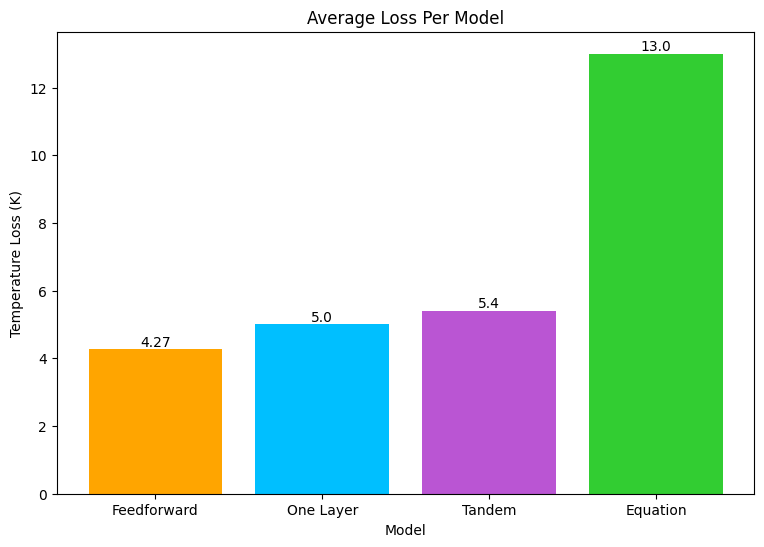

In [5]:
colors = ['orange', 'deepskyblue', 'mediumorchid', 'limegreen']
values = [4.26594352722168, 5.003502076322382, sum(tandem)/len(tandem), 13]
x_labels = ['Feedforward', 'One Layer', 'Tandem', 'Equation']

plt.figure(figsize=(9,6))

plt.bar(x_labels, values, color=colors)

plt.xlabel('Model')
plt.ylabel('Temperature Loss (K)')
plt.title('Average Loss Per Model')


# Function to add value labels to the bars
def add_value_labels(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), 
                ha='center', va='bottom')

# Call the function to add value labels
add_value_labels(plt.gca())


plt.show()
